In [1]:
from google.colab import drive
drive.mount("/content/drive")

# setup credential
!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)

# go to directory
%cd /content/drive/MyDrive/Colab\ Notebooks/EECS_442_HOI

Mounted at /content/drive
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Looks that a private key is already created. If you have already push it to github, no action required.
 Otherwise, Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAICeyklL46g42c+kOiDGQYpBIkUVa8Oott1qwDIqq8fti root@8ae8a1039f30

Please use SSH method to clone repo.
/content/drive/MyDrive/Colab Notebooks/EECS_442_HOI


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 9.9 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator
from torchvision.io import read_image
import torch
import numpy as np
from matplotlib import pyplot as plt

# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model
# model = YOLO('path/to/best.pt')  # load a custom model

# Predict with the model
results = model('example_images/me.jpg')  # predict on an image


image 1/1 /content/drive/MyDrive/Colab Notebooks/EECS_442_HOI/example_images/me.jpg: 640x480 1 person, 842.0ms
Speed: 39.1ms preprocess, 842.0ms inference, 29.4ms postprocess per image at shape (1, 3, 640, 480)


results type reference: https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.Masks.__init__

In [33]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9054])
data: tensor([[2.4300e+02, 3.7700e+02, 1.1790e+03, 1.5680e+03, 9.0536e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1707, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[ 711.0000,  972.5000,  936.0000, 1191.0000]])
xywhn: tensor([[0.5555, 0.5697, 0.7312, 0.6977]])
xyxy: tensor([[ 243.,  377., 1179., 1568.]])
xyxyn: tensor([[0.1898, 0.2209, 0.9211, 0.9186]])


torch.Size([3, 1707, 1280])
243.0
[711.0, 972.5]
torch.Size([3, 1191, 936])


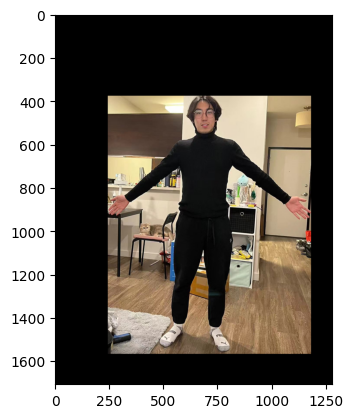

In [75]:
# corping image
origin_img = read_image('example_images/me.jpg')
print(origin_img.shape)
xy = boxes.xyxy[0]
print(xy[0].item())

human_center = [(xy[0].item() + xy[2].item())/2, (xy[1].item() + xy[3].item())/2]
print(human_center)

selected = origin_img[:, int(xy[1].item()) : int(xy[3].item()), int(xy[0].item()) : int(xy[2].item())]
canvas = torch.zeros_like(origin_img)
canvas[:, int(xy[1].item()) : int(xy[3].item()), int(xy[0].item()) : int(xy[2].item())] = selected
print(selected.shape)
np_canvas = canvas.permute((1,2,0)).cpu().detach().numpy()
plt.imshow(np_canvas)

(1707, 1280, 3)


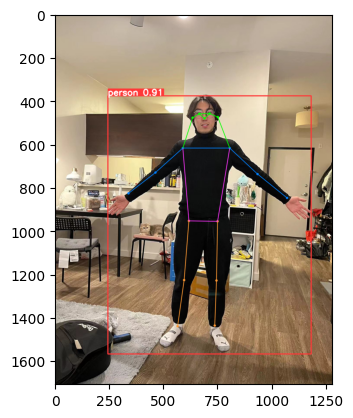

In [66]:
from PIL import Image
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    print(im_array.shape)
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    plt.imshow(im)  # show image
    im.save('example_images/me_pose_results.jpg')  # save image

## Get only the pose without the original image

torch.Size([3, 1707, 1280])
(1707, 1280, 3)
(1707, 1280, 3)


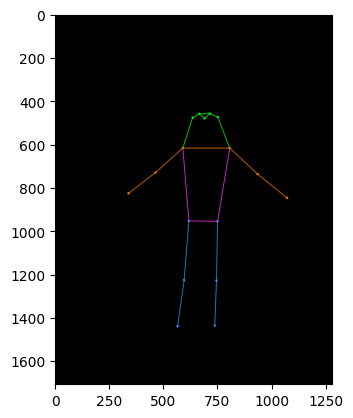

In [73]:
original_img = read_image('example_images/me.jpg')
print(original_img.shape)
empty_img = np.zeros((original_img.shape[1], original_img.shape[2], original_img.shape[0]), dtype='uint8')
print(empty_img.shape)
annotator = Annotator(empty_img)
for k in reversed(keypoints.data):
  annotator.kpts(k)
kpts_results = annotator.result()
print(kpts_results.shape)
im = Image.fromarray(kpts_results[..., ::-1])  # RGB PIL image
im.save('example_images/me_pose_only_results.jpg')  # save image

plt_img = torch.tensor(kpts_results).permute((1,2,0)) # convert into (3, h, w) the input size that the feature extractor wants
plt.imshow(kpts_results)

tensor(688.7294)
tensor(712.6423)
tensor(664.6217)
tensor(749.6151)
tensor(633.1743)
tensor(804.2055)
tensor(588.1779)
tensor(932.3011)
tensor(462.7106)
tensor(1068.2789)
tensor(338.5097)
tensor(748.3243)
tensor(616.2258)
tensor(743.6795)
tensor(594.5466)
tensor(735.8828)
tensor(564.8860)


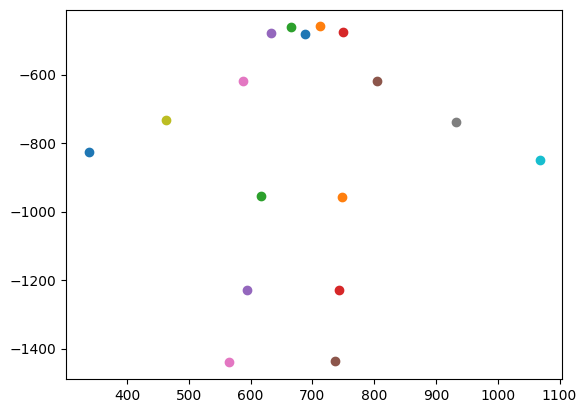

In [70]:
import matplotlib.pyplot as plt


plt.figure()

for i, k in enumerate(keypoints.xy[0]):
  x_coord, y_coord = k[0], k[1]
  print(x_coord)
  plt.scatter(x_coord, -y_coord)

# print(keypoints.xy[0])
# print(keypoints.xy[0][:,1])
# plt.figure()
# plt.plot(keypoints.xy[0][:,0], keypoints.xy[0][:,1])

100%|██████████| 6.73M/6.73M [00:00<00:00, 53.0MB/s]

100%|██████████| 476k/476k [00:00<00:00, 12.4MB/s]
image 1/1 /content/drive/MyDrive/Colab Notebooks/EECS_442_HOI/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 299.6ms
Speed: 4.3ms preprocess, 299.6ms inference, 30.8ms postprocess per image at shape (1, 3, 640, 480)


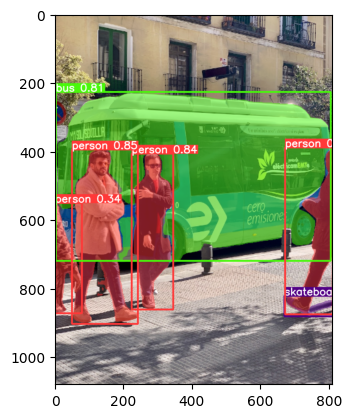

In [4]:
# Load a model
seg_model = YOLO('yolov8n-seg.pt')  # load an official model
# model = YOLO('path/to/best.pt')  # load a custom model

# Predict with the model
seg_results = seg_model('https://ultralytics.com/images/bus.jpg')  # predict on an image

from PIL import Image
# Show the results
for r in seg_results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    # print(im_array.shape)
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    plt.imshow(im)  # show image
    # im.save('example_images/me_pose_results.jpg')  # save image